## Project 2 - Reddit Dataset

### Modelling

Modelling the combined dataset and individual dataset

Importing the python libraries, reading the wine dataset, data exploration and selection of the data and labels

1. Numpy: It will provide the support for efficient numerical computation.
2. Pandas: It is convenient library that supports dataframes. Working with pandas will bring ease in many crucial data operations.
3. Matplotlib: It provides a MATLAB-like plotting framework.
4. Seaborn: It is a visualization library based on matplotlib which provides a high-level interface for drawing attractive statistical graphics.
5. Sklearn: It is python library for data mining, data analysis and machine learning.

In [22]:
import sys
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [23]:
import sklearn.preprocessing as preproc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_extraction import text

In [24]:
%ls *.csv

 Volume in drive C is OS
 Volume Serial Number is D02B-1246

 Directory of C:\Users\somak\Desktop\McMaster University\Term 2 - Winter Term 2019\CHEMENG 787 Machine Learning  Classification Models\Python-Reddit-Data-Prediction-Machine-Learning

2020-04-15  10:47 PM        17,599,245 combined_data.csv
2020-04-15  10:47 PM        71,282,650 RS_2019_01_02_03_04.csv
2020-04-15  10:47 PM        36,320,928 RS_2019_05_06.csv
2020-04-15  10:47 PM        36,030,582 RS_2019_07_08.csv
2020-04-15  10:47 PM         4,363,791 testing_data.csv
2020-04-15  10:47 PM         8,768,650 training_data.csv
2020-04-15  10:47 PM         4,359,937 validation_data.csv
               7 File(s)    178,725,783 bytes
               0 Dir(s)  50,990,391,296 bytes free


### Loading Combined Dataset

In [25]:
combined_data = pd.read_csv("combined_data.csv")

In [26]:
combined_data.shape

(79999, 17)

In [27]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79999 entries, 0 to 79998
Data columns (total 17 columns):
Unnamed: 0           79999 non-null int64
title                79999 non-null object
archived             79509 non-null object
author               79999 non-null object
author_flair_text    9160 non-null object
created_utc          79999 non-null int64
subreddit_id         79999 non-null object
score                79999 non-null int64
retrieved_on         79999 non-null int64
gilded               79999 non-null int64
id                   79999 non-null object
subreddit            79999 non-null object
distinguished        889 non-null object
url                  79999 non-null object
num_comments         79999 non-null float64
score_category       79999 non-null object
Numerical_Score      79999 non-null int64
dtypes: float64(1), int64(6), object(10)
memory usage: 10.4+ MB


In [28]:
combined_data.head()

,Unnamed: 0,title,archived,author,author_flair_text,created_utc,subreddit_id,score,retrieved_on,gilded,id,subreddit,distinguished,url,num_comments,score_category,Numerical_Score
0,0,The January 2019 Superthread,False,Racer_77,The Wiki Mod™ :pixel2xlblack:,1546360220,t5_3aobb,1656,1548973150,0,aa66wl,GooglePixel,moderator,https://www.reddit.com/r/GooglePixel/comments/...,14.0,Popular,4
1,1,Have a perfectly balanced happy new year from ...,False,Dark_pheonix1183,Spider-Man,1546300881,t5_2uii8,1524,1552566683,0,abct96,marvelstudios,NaN,https://v.redd.it/lvyg8smibp721,2.0,Popular,4
2,2,You are not able to build on top of this gas s...,False,[deleted],NaN,1546300890,t5_3oeyf,1395,1552566695,0,abcuax,FortNiteBR,NaN,https://v.redd.it/7df5xwixbp721,0.0,Popular,4
3,3,Showerthought: F-14 Tomcats used by the Irania...,False,ChineseToTheBone,NaN,1546300800,t5_2tifv,1790,1552566697,0,abcufh,hoggit,NaN,https://www.reddit.com/r/hoggit/comments/abcuf...,27.0,Popular,4
4,4,Game Thread - Tampa Bay Lightning @ Anaheim Ducks,False,wild-wing,NaN,1546300800,t5_2rqhz,1741,1552566697,0,abcufj,AnaheimDucks,NaN,https://www.reddit.com/r/AnaheimDucks/comments...,109.0,Popular,4


### Modelling 

Now that our text is in the format we want, we can begin the process of modeling.

There are a few steps we must do before we start running models: we have to define the X and y variables and run a train-test split on the data.

In [29]:
feature_cols = ['title', 'archived', 'author', 'author_flair_text', 'created_utc', 'subreddit_id',
                'score', 'retrieved_on', 'gilded', 'id', 'subreddit', 'distinguished', 'url', 'num_comments', 'score_category']
X = combined_data[feature_cols] # Features
y = combined_data.Numerical_Score # Target variable

In [30]:
X = combined_data.num_comments
y = combined_data.Numerical_Score

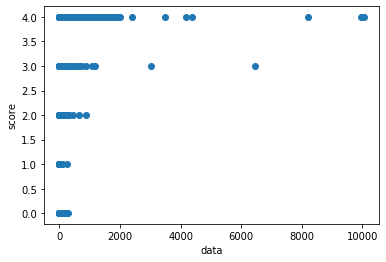

In [31]:
plt.scatter(X, y)
plt.xlabel('data')
plt.ylabel('score')
plt.show()

### Transform features

A train-test split is important because it allows us to reserve a portion of our data for test so that the model does not see all data before predicting. In this case we want to preserve the distribution of the classes, so we will stratify the data to match the distribution of the classes.

Finally we split our data into a Training set and Validation set using scikit-learn "train_test_split" function.

In [32]:
training_data, test_data = train_test_split(combined_data, test_size=0.3, random_state=123)

In [33]:
bow_transform = text.CountVectorizer()

In [34]:
X_tr_bow = bow_transform.fit_transform(training_data['title'])
X_te_bow = bow_transform.transform(test_data['title'])

In [35]:
len(bow_transform.vocabulary_)

47330

In [36]:
X_tr_bow.shape

(55999, 47330)

In [37]:
y_tr = training_data['Numerical_Score']
y_te = test_data['Numerical_Score']

In [38]:
X_tr_bow

<55999x47330 sparse matrix of type '<class 'numpy.int64'>'
	with 468122 stored elements in Compressed Sparse Row format>

In [39]:
tfidf_trfm = text.TfidfTransformer(norm=None)

X_tr_tfidf = tfidf_trfm.fit_transform(X_tr_bow)
X_te_tfidf = tfidf_trfm.transform(X_te_bow)

In [40]:
X_tr_l2 = preproc.normalize(X_tr_bow, axis=0)
X_te_l2 = preproc.normalize(X_te_bow, axis=0)

### logistic Regression

In [41]:
def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C=1.0):
    m = LogisticRegression(C=_C).fit(X_tr, y_tr)
    s = m.score(X_test, y_test)
    print ('Test score with', description, 'features:', s)
    return m

In [42]:
m1 = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')
m2 = simple_logistic_classify(X_tr_l2, y_tr, X_te_l2, y_te, 'l2-normalized')
m3 = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf')

Test score with bow features: 0.38758333333333334
Test score with l2-normalized features: 0.3832083333333333
Test score with tf-idf features: 0.3562916666666667


### Linear Regression

In [43]:
model_performance_dict = dict()

In [44]:
linear = LinearRegression()
linear.fit(X_tr_bow, y_tr)

model = linear
y_predicted = model.predict(X_te_bow)
r2 = r2_score(y_te, y_predicted)
mse = mean_squared_error(y_te, y_predicted)
mae = mean_absolute_error(y_te, y_predicted)
print(f"Linear Regression ")
print(f"==================")
print(f"Value of R-Sq: {r2:.4}")
print(f"Value of RMSE: {np.sqrt(mse)}")
print(f"Value of MAE: {mae}")

Linear Regression 
Value of R-Sq: -1.477
Value of RMSE: 1.955814781413484
Value of MAE: 1.415537034594617


### KNN Regression

In [45]:
knr = KNeighborsRegressor()
knr.fit(X_tr_bow, y_tr)

model = knr
y_predicted = model.predict(X_te_bow)
r2 = r2_score(y_te, y_predicted)
mse = mean_squared_error(y_te, y_predicted)
mae = mean_absolute_error(y_te, y_predicted)
print(f"KNN Regression ")
print(f"===============")
print(f"Value of R-Sq: {r2:.4}")
print(f"Value of RMSE: {np.sqrt(mse)}")
print(f"Value of MAE: {mae}")

KNN Regression 
Value of R-Sq: -0.09707
Value of RMSE: 1.3016156626797841
Value of MAE: 1.06925


### Decision Tree

In [46]:
dt = DecisionTreeRegressor(min_samples_split=45, min_samples_leaf=45, random_state = 10)
dt.fit(X_tr_bow, y_tr)

model = dt
y_predicted = model.predict(X_te_bow)
r2 = r2_score(y_te, y_predicted)
mse = mean_squared_error(y_te, y_predicted)
mae = mean_absolute_error(y_te, y_predicted)
print(f"Decision Tree ")
print(f"==============")
print(f"Value of R-Sq: {r2:.4}")
print(f"Value of RMSE: {np.sqrt(mse)}")
print(f"Value of MAE: {mae}")

Decision Tree 
Value of R-Sq: 0.06674
Value of RMSE: 1.2005106538547106
Value of MAE: 0.992301648741583


### Random Forest

In [47]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=70, min_samples_leaf=10, random_state = 10)
rf.fit(X_tr_bow, y_tr)

model = rf
y_predicted = model.predict(X_te_bow)
r2 = r2_score(y_te, y_predicted)
mse = mean_squared_error(y_te, y_predicted)
mae = mean_absolute_error(y_te, y_predicted)
print(f"Random Forest ")
print(f"===============")
print(f"Value of R-Sq: {r2:.4}")
print(f"Value of RMSE: {np.sqrt(mse)}")
print(f"Value of MAE: {mae}")

Random Forest 
Value of R-Sq: 0.1008
Value of RMSE: 1.178383269868654
Value of MAE: 0.9716155746554924


### Gradient Boosting Regression

In [48]:
gbr = GradientBoostingRegressor(n_estimators=70, max_depth=5)
gbr.fit(X_tr_bow, y_tr)

model = gbr
y_predicted = model.predict(X_te_bow)
r2 = r2_score(y_te, y_predicted)
mse = mean_squared_error(y_te, y_predicted)
mae = mean_absolute_error(y_te, y_predicted)
print(f"Gradient Boosting Regression ")
print(f"==============================")
print(f"Value of R-Sq: {r2:.4}")
print(f"Value of RMSE: {np.sqrt(mse)}")
print(f"Value of MAE: {mae}")

Gradient Boosting Regression 
Value of R-Sq: 0.06836
Value of RMSE: 1.1994737844943333
Value of MAE: 0.9920039149379606


### Prediction with Individual data

As we already created Training and Testing data earlier, we will now do the prediction on the individual data

In [49]:
training_data_individual = pd.read_csv("training_data.csv")
training_data_individual.shape

(39999, 17)

In [50]:
training_data_individual.head()

,Unnamed: 0,title,archived,author,author_flair_text,created_utc,subreddit_id,score,retrieved_on,gilded,id,subreddit,distinguished,url,num_comments,score_category,Numerical_Score
0,0,The January 2019 Superthread,False,Racer_77,The Wiki Mod™ :pixel2xlblack:,1546360220,t5_3aobb,1180,1548973150,0,aa66wl,GooglePixel,moderator,https://www.reddit.com/r/GooglePixel/comments/...,14.0,Popular,4
1,1,Have a perfectly balanced happy new year from ...,False,Dark_pheonix1183,Spider-Man,1546300881,t5_2uii8,1048,1552566683,0,abct96,marvelstudios,NaN,https://v.redd.it/lvyg8smibp721,2.0,Popular,4
2,2,You are not able to build on top of this gas s...,False,[deleted],NaN,1546300890,t5_3oeyf,919,1552566695,0,abcuax,FortNiteBR,NaN,https://v.redd.it/7df5xwixbp721,0.0,Popular,4
3,3,Showerthought: F-14 Tomcats used by the Irania...,False,ChineseToTheBone,NaN,1546300800,t5_2tifv,1314,1552566697,0,abcufh,hoggit,NaN,https://www.reddit.com/r/hoggit/comments/abcuf...,27.0,Popular,4
4,4,Game Thread - Tampa Bay Lightning @ Anaheim Ducks,False,wild-wing,NaN,1546300800,t5_2rqhz,1265,1552566697,0,abcufj,AnaheimDucks,NaN,https://www.reddit.com/r/AnaheimDucks/comments...,109.0,Popular,4


In [51]:
testing_data_individual = pd.read_csv("testing_data.csv")
testing_data_individual.shape

(20000, 17)

In [52]:
testing_data_individual.head()

,Unnamed: 0,title,archived,author,author_flair_text,created_utc,subreddit_id,score,retrieved_on,gilded,id,subreddit,distinguished,url,num_comments,score_category,Numerical_Score
0,0,Job Description for the Stay-At-Home Mom Job D...,NaN,Donaldfxre,NaN,1556668800,t5_yy0v9,1,1556755178,0,bjalrb,u_Donaldfxre,NaN,https://fastmoney.moneybot.in.net/job-descript...,0,No-Votes,1
1,1,Because I’ve hurt my bf (M24) in the past I (F...,False,throwaway9173649266,NaN,1556668800,t5_2qjvn,1,1560620602,0,bjalrc,relationships,NaN,https://www.reddit.com/r/relationships/comment...,1,No-Votes,1
2,2,Found this Music Note Watch On The Street In A...,False,[deleted],NaN,1556668800,t5_2ti4h,16,1560620602,0,bjalrd,mildlyinteresting,NaN,https://i.redd.it/xjahiippphv21.png,1,11-50 Votes,3
3,3,Once I had a nightmare that started looking ov...,False,Jackson-King,"🎉 1,000,000 Attendee! 🎉",1556668800,t5_2rjli,6,1560620602,0,bjalre,teenagers,NaN,https://www.reddit.com/r/teenagers/comments/bj...,3,2-10 Votes,2
4,4,Babe with Big Ass Fucks in Ripped Fishnets and...,False,hot-x,NaN,1556668800,t5_wnujb,1,1560620602,0,bjalrf,make_me_cum,NaN,https://www.pornhub.com/view_video.php?viewkey...,0,No-Votes,1


In [53]:
bow_transform = text.CountVectorizer()

In [54]:
X_tr_bow = bow_transform.fit_transform(training_data_individual['title'])
X_te_bow = bow_transform.transform(testing_data_individual['title'])

In [55]:
len(bow_transform.vocabulary_)

37263

In [56]:
X_tr_bow.shape

(39999, 37263)

In [57]:
y_tr = training_data_individual['Numerical_Score']
y_te = testing_data_individual['Numerical_Score']

In [58]:
X_tr_bow

<39999x37263 sparse matrix of type '<class 'numpy.int64'>'
	with 329562 stored elements in Compressed Sparse Row format>

### Linear Regression

In [59]:
linear = LinearRegression()
linear.fit(X_tr_bow, y_tr)

model = linear
y_predicted = model.predict(X_te_bow)
r2 = r2_score(y_te, y_predicted)
mse = mean_squared_error(y_te, y_predicted)
mae = mean_absolute_error(y_te, y_predicted)
print(f"Linear Regression ")
print(f"==================")
print(f"Value of R-Sq: {r2:.4}")
print(f"Value of RMSE: {np.sqrt(mse)}")
print(f"Value of MAE: {mae}")

Linear Regression 
Value of R-Sq: -4.498
Value of RMSE: 2.6005993341069518
Value of MAE: 1.8250948775400269


### KNN Regression

In [60]:
knr = KNeighborsRegressor()
knr.fit(X_tr_bow, y_tr)

model = knr
y_predicted = model.predict(X_te_bow)
r2 = r2_score(y_te, y_predicted)
mse = mean_squared_error(y_te, y_predicted)
mae = mean_absolute_error(y_te, y_predicted)
print(f"KNN Regression ")
print(f"===============")
print(f"Value of R-Sq: {r2:.4}")
print(f"Value of RMSE: {np.sqrt(mse)}")
print(f"Value of MAE: {mae}")

KNN Regression 
Value of R-Sq: -0.5151
Value of RMSE: 1.3651183098911244
Value of MAE: 1.13446


### Gradient Boosting Regression

In [61]:
gbr = GradientBoostingRegressor(n_estimators=70, max_depth=5)
gbr.fit(X_tr_bow, y_tr)

model = gbr
y_predicted = model.predict(X_te_bow)
r2 = r2_score(y_te, y_predicted)
mse = mean_squared_error(y_te, y_predicted)
mae = mean_absolute_error(y_te, y_predicted)
print(f"Gradient Boosting Regression ")
print(f"==============================")
print(f"Value of R-Sq: {r2:.4}")
print(f"Value of RMSE: {np.sqrt(mse)}")
print(f"Value of MAE: {mae}")

Gradient Boosting Regression 
Value of R-Sq: -0.08323
Value of RMSE: 1.1542843595864
Value of MAE: 0.983596199651903
